# Raíces de Polinomio Chebyshev
En este apartado se determinan las raíces de los polinomios de Chebyshev $T_{11}$ y $T_{21}$ que a su vez serán los nodos utilizados para los distintos métodos de interpolación requeridos en la actividad

## Bibliotecas y dependencias

In [1]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev


## Funciones de trabajo

Las funciones que analizaremos en esta actividad son:

* $f(x) = \sin(x)$

* $f(x) = \frac{1}{1 + 25x^2}$

* $f(x) = e^{-20x^2}$



En python vendrían definidas como:


In [2]:
#Funciones de trabajo

def y_1(x:np.array)->np.array:
  '''
  Devuelve el resultado del seno de cada elemento de x
    y = np.sin(x)
  inputs:
    x (np.array): arreglo unidimensional de valores de x en radianes

  return:
    sin(x) (np.array): seno del ángulo para cada valor de x
  '''
  return np.sin(x)

def y_2(x:np.array)->np.array:
  '''
  Devuelve el resultado de la expresión 1/(1+(25*x**2)) para cada elemento de x
    y = 1/(1+(25*x**2))
  inputs:
    x(np.array): arreglo unidimensional de valores de x

  return:
    1/(1+(25*x**2)) (np.array): resultado de la expresión dada para cada valor de x
  '''
  return 1/(1+(25*x**2))

def y_3(x:np.array)->np.array:
  '''
  Devuelve el resultado de la expresión np.exp(-20*x**2) para cada elemento de x
    y = np.exp(-20*x**2)
  inputs:
    x (np.array): arreglo unidimensional de valores de x

  return:
    np.exp(-20*x**2) (np.array): resultado de la expresión para cada valor de x
  '''

  return np.exp(-20*x**2)


Para determinar el rango de valores más apropiado para evaluar las funciones mencionadas, se lleva a cabo un análisis del dominio de cada función.

El dominio de la función $f(x)=sin(x)$ pertenece a todos los reales, lo que podemos acotar los valores de entrada x en una revolución completa: $[-\pi, \pi]$.

Esta misma propiedad se extiende al dominio de las funciones $f(x) = \frac{1}{1 + 25x^2}$ y $f(x) = e^{-20x^2}$ ya que ambas pertenecen al conjunto de todos los números reales, dado que el valor de x es elevado al cuadrado.

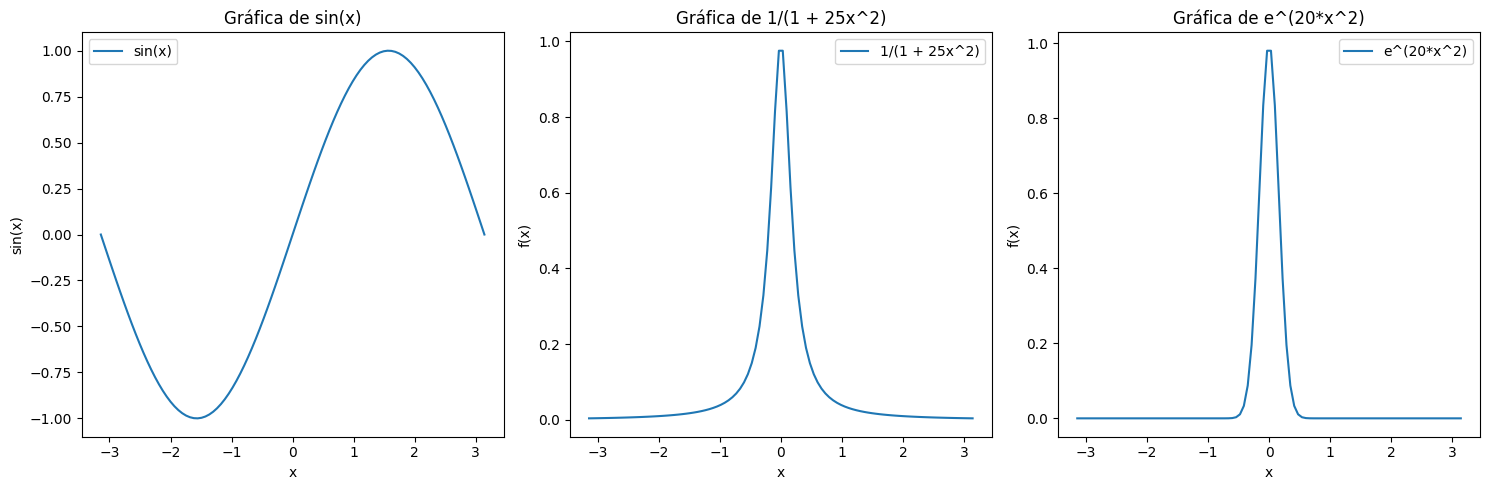

In [3]:
x = np.linspace(-np.pi, np.pi, 100) #valores de x

#funciones evaluadas en un rango dado para visualizar su dominio
y_f1 = y_1(x)
y_f2 = y_2(x)
y_f3 = y_3(x)

# Subgráficos
plt.figure(figsize=(15, 5))

# f(x) = sin(x)
plt.subplot(1, 3, 1)
plt.plot(x, y_f1, label='sin(x)')
plt.title('Gráfica de sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')

plt.legend()

# f(x) = 1/(1 + 25x^2)
plt.subplot(1, 3, 2)
plt.plot(x, y_f2, label='1/(1 + 25x^2)')
plt.title('Gráfica de 1/(1 + 25x^2)')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()

# f(x) = e^(20*x^2)
plt.subplot(1, 3, 3)
plt.plot(x, y_f3, label='e^(20*x^2)')
plt.title('Gráfica de e^(20*x^2)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()


plt.tight_layout()
plt.show()

## Raíces de los Polinomios
### Polinomio de grado 11

Se ha utilizado la biblioteca `numpy.polynomial.chebyshev` para calcular las raíces del polinomio de Chebyshev de grado 11 en el intervalo $[-\pi, \pi]$
Se utiliza el método `roots()` para calcular las raíces del polinomio de Chebyshev. Estas raíces son los valores de $x$ para los cuales el polinomio se anula

In [4]:
#para 11 nodos
coeffs_cheb_11 = [0] * 11 + [1]
T11 = chebyshev.Chebyshev(coeffs_cheb_11, [-np.pi, np.pi])
roots_ch_11 = T11.roots()
roots_ch_11


array([-3.10961577e+00, -2.85769319e+00, -2.37425731e+00, -1.69847322e+00,
       -8.85088931e-01, -4.46691646e-17,  8.85088931e-01,  1.69847322e+00,
        2.37425731e+00,  2.85769319e+00,  3.10961577e+00])

### Polinomio grado 21
Análogamente al paso anterior,  se determinan las raíces del polinomio grado 21 con los valores de $x$ para los cuales el polinomio se anula en el intervalo $[-\pi, \pi]$

In [5]:
#para 21 nodos
coeffs_cheb_21 = [0] * 21 + [1]
T21 = chebyshev.Chebyshev(coeffs_cheb_21, [-np.pi, np.pi])
roots_ch_21 = T21.roots()
roots_ch_21

array([-3.13280812e+00, -3.06282637e+00, -2.92442613e+00, -2.72069905e+00,
       -2.45619604e+00, -2.13682568e+00, -1.76972216e+00, -1.36308597e+00,
       -9.26000691e-01, -4.68230088e-01, -5.29500782e-16,  4.68230088e-01,
        9.26000691e-01,  1.36308597e+00,  1.76972216e+00,  2.13682568e+00,
        2.45619604e+00,  2.72069905e+00,  2.92442613e+00,  3.06282637e+00,
        3.13280812e+00])

## Comprobación Gráfica
A continuación se muestran los puntos de interpolación de Chebyshev grado 11 y 21 para cada una de las funciones de trabajo.

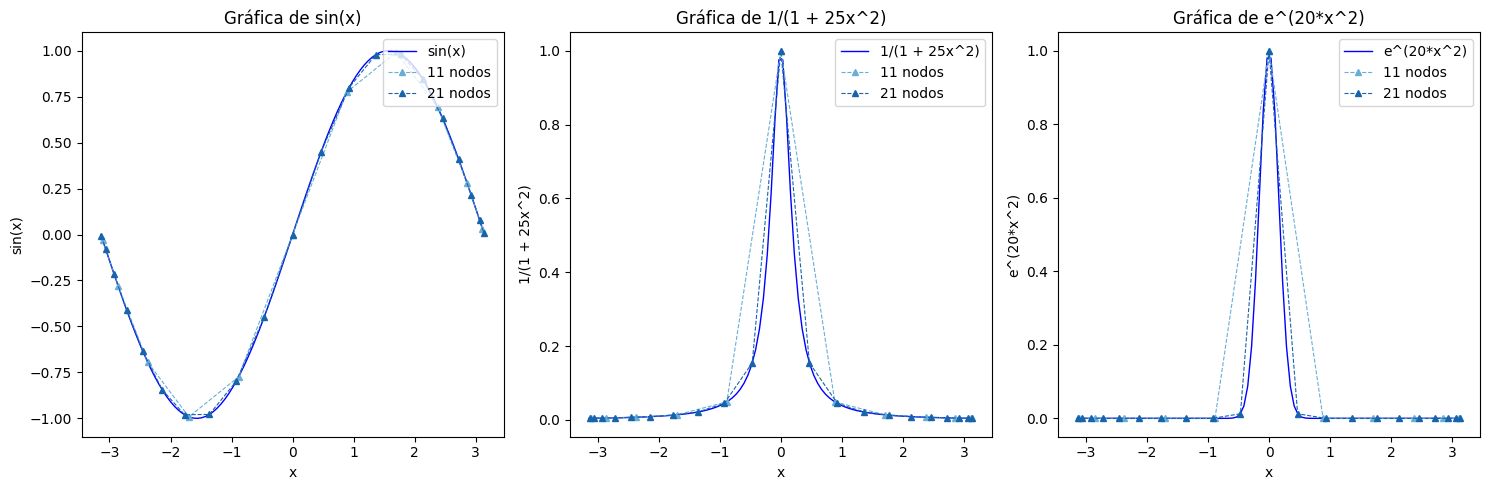

In [6]:
import matplotlib.cm as cm
cmap = cm.Blues


plt.figure(figsize=(15, 5))
# f(x) = sin(x)
plt.subplot(1, 3, 1)
plt.plot(x, y_f1, label='sin(x)', linestyle='-', color='blue', linewidth=1)
plt.plot(roots_ch_11, y_1(roots_ch_11), label='11 nodos',linewidth=0.8, color=cmap(0.5), linestyle='--', marker='^', markersize=4)
plt.plot(roots_ch_21, y_1(roots_ch_21), label='21 nodos',linewidth=0.8, color=cmap(0.8), linestyle='--', marker='^', markersize=4)
plt.title('Gráfica de sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend(loc='upper right')



# f(x) = 1/(1 + 25x^2)
plt.subplot(1, 3, 2)
plt.plot(x, y_f2, label='1/(1 + 25x^2)', linestyle='-', color='blue', linewidth=1)
plt.plot(roots_ch_11, y_2(roots_ch_11), label='11 nodos',linewidth=0.8, color=cmap(0.5), linestyle='--', marker='^', markersize=4)
plt.plot(roots_ch_21, y_2(roots_ch_21), label='21 nodos',linewidth=0.8, color=cmap(0.8), linestyle='--', marker='^', markersize=4)
plt.title('Gráfica de 1/(1 + 25x^2)')
plt.xlabel('x')
plt.ylabel('1/(1 + 25x^2)')
plt.legend(loc='upper right')

# f(x) = e^(20*x^2)
plt.subplot(1, 3, 3)
plt.plot(x, y_f3, label='e^(20*x^2)', linestyle='-', color='blue', linewidth=1)
plt.plot(roots_ch_11, y_3(roots_ch_11), label='11 nodos',linewidth=0.8, color=cmap(0.5), linestyle='--', marker='^', markersize=4)
plt.plot(roots_ch_21, y_3(roots_ch_21), label='21 nodos',linewidth=0.8, color=cmap(0.8), linestyle='--', marker='^', markersize=4)
plt.title('Gráfica de e^(20*x^2)')
plt.xlabel('x')
plt.ylabel('e^(20*x^2)')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Guardamos los nodos generados para su uso posterior

In [7]:
np.savetxt('nodos_21.txt', roots_ch_21)
np.savetxt('nodos_11.txt', roots_ch_11)

También generaremos los nodos equiespaciados

In [8]:
nodos_equis_11 = np.linspace(-np.pi, np.pi, num=11)
nodos_equis_21 = np.linspace(-np.pi, np.pi, num=21)

np.savetxt('nodos_equis_21.txt', nodos_equis_21)
np.savetxt('nodos_equis_11.txt', nodos_equis_11)

# REFERENCIAS

* Cano, J. (2020). Ajuste e interpolación unidimensionales básicos en Python con SciPy. Disponible en: https://pybonacci.org/2013/08/15/ajuste-e-interpolacion-unidimensionales-basicos-en-python-con-scipy/
* Chebyshev Numpy Class. Disponible en: https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.Chebyshev.html
* Segura, J. (s.f). Interpolación de Chebyshev. Disponible en: https://personales.unican.es/segurajj/interp_p.pdf


